In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2010-01-10'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()   

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.336883,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.264799,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.353168,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.316373,432894000
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.210815,594067600


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908997,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974510,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733627,144114400


In [14]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.336881,462229600
1,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.264799,594459600
2,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.353168,605892000
3,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.316373,432894000
4,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.210815,594067600


In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.600000,7.607143,7.444643,7.503929,462229600
1,7.471071,7.491786,7.372143,7.418571,594459600
2,7.423929,7.533214,7.289286,7.523214,605892000
3,7.503929,7.516429,7.465000,7.479643,432894000
4,7.533214,7.557143,7.352500,7.354643,594067600


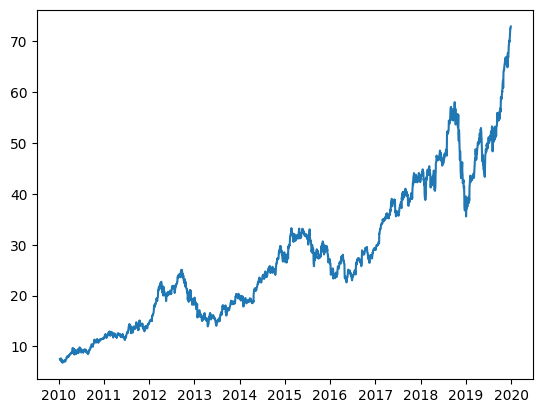

In [5]:
plt.plot(df.Close)

In [17]:
df

,Open,High,Low,Close,Volume
0,7.600000,7.607143,7.444643,7.503929,462229600
1,7.471071,7.491786,7.372143,7.418571,594459600
2,7.423929,7.533214,7.289286,7.523214,605892000
3,7.503929,7.516429,7.465000,7.479643,432894000
4,7.533214,7.557143,7.352500,7.354643,594067600
...,...,...,...,...,...
2505,70.132500,71.062500,70.092499,71.000000,98572000
2506,71.172501,71.222504,70.730003,71.067497,48478800
2507,71.205002,72.495003,71.175003,72.477501,93121200
2508,72.779999,73.492500,72.029999,72.449997,146266000


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15          NaN
                ...    
2019-12-23    59.201075
2019-12-24    59.401700
2019-12-26    59.643125
2019-12-27    59.875125
2019-12-30    60.106325
Name: Close, Length: 2510, dtype: float64

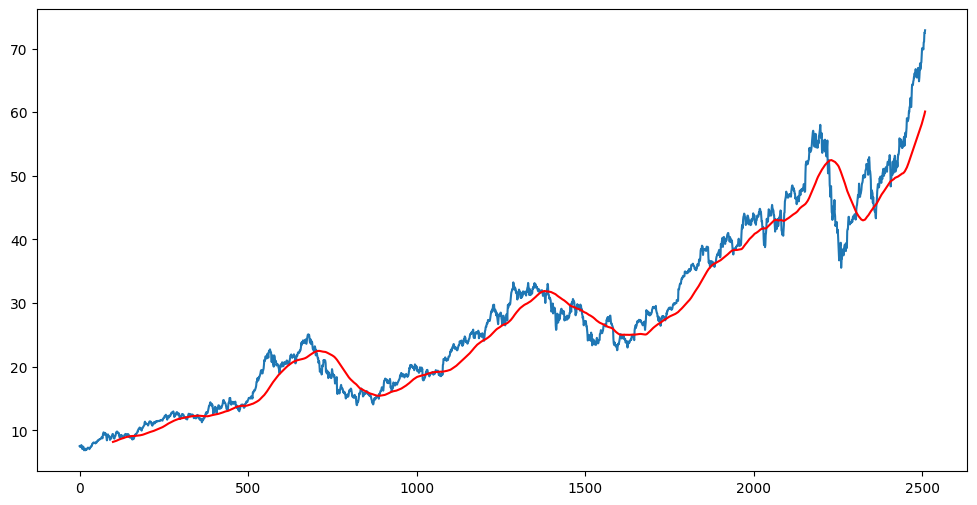

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [21]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2505    54.132313
2506    54.261513
2507    54.396763
2508    54.529350
2509    54.661100
Name: Close, Length: 2510, dtype: float64

NameError: name 'ma200' is not defined

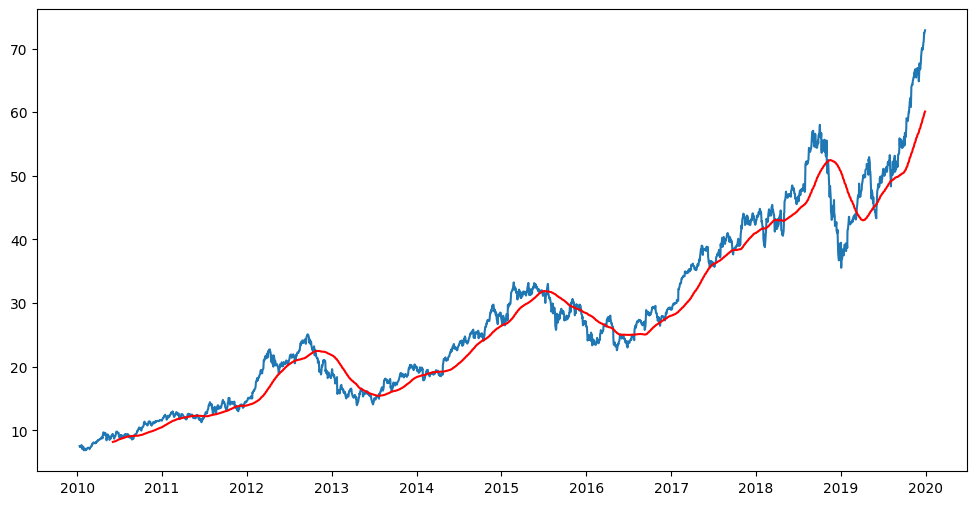

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [25]:
df.shape


(2510, 5)

In [11]:
# splitting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

NameError: name 'pd' is not defined

In [10]:
data_training.head()

NameError: name 'data_training' is not defined

In [30]:
data_testing.head()

,Close
1757,29.037500
1758,29.004999
1759,29.152500
1760,29.477501
1761,29.747499


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

NameError: name 'scaler' is not defined

In [8]:
data_training_array.shape

NameError: name 'data_training_array' is not defined

In [2]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

NameError: name 'data_training_array' is not defined

In [6]:
x_train.shape


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# ML Model

In [46]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [1]:
model = Sequential()

# Adding the first LSTM layer with dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Adding the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Adding the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units = 1))


NameError: name 'Sequential' is not defined